In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path_1 = '../results_MIPS_Fastest_Random.csv'

file_path_2 = '../results_MIPS_Slowest_EIF.csv'
#column_names = ['delta', 'state', 'time', 'occupation', 'fairness']
#df = pd.read_csv(file_path)

In [3]:
csv_dict = []
def load_file(file_path, csv_dict):
    with open(file_path, 'r') as file:
        # Iterate over each line in the fileplt.plot(x_fit, y_fit, color='green', label='Polynomial Approximation')
        for line in file:
            # Split the line content by comma
            line_data = line.strip().split(',')
    
            if len(line_data) == 7:
                seven_keys = ['delta', 'state', 'time', 'occupation', 'fairness', 'allocated', 'skipped']
                csv_dict.append(dict(zip(seven_keys, line_data)))
    
            elif len(line_data) == 15:
                fifteen_keys = ['method', 'execution time', 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                csv_dict.append(dict(zip(fifteen_keys, line_data)))
            elif len(line_data) == 19:
                nineteen_keys = ['method', 'start time', 'end time', 'real execution time', 'system execution time',
                                 'delta', 'average make span', 'result message',
                                'makespan', 'resource occupation', 'resource fairness', 'weighted resource fairness',
                                'assigned tasks', 'allocated tasks', 'postponed tasks',
                                'optimal solution', 'feasible solution', 'no solution',
                                'resource worklist rule'
                                ]
                row_dict = dict(zip(nineteen_keys, line_data))
                for k in ['optimal solution', 'feasible solution', 'no solution']:
                    if row_dict[k] == '':
                        row_dict[k] = 0
                csv_dict.append(row_dict)
            else:
                print(len(line_data))

df_dtypes = {'method' : str, 'start time' : str, 'end time' : str, 'real execution time' : float, 'system execution time' : float,
             'delta' : float, 'makespan' : float, 'result message' : str,
             'makespan' : float, 'resource occupation' : float, 'resource fairness' : float, 'weighted resource fairness' : float,
             'assigned tasks' : int, 'allocated tasks' : int, 'postponed tasks' : int,
             'optimal solution' : int, 'feasible solution' : int, 'no solution' : int,
             'resource worklist rule' : str}

load_file(file_path_1, csv_dict)
load_file(file_path_2, csv_dict)
df = pd.DataFrame(csv_dict)
for k, v in df_dtypes.items():
    df[k] = df[k].astype(v)

In [4]:
df

,method,start time,end time,real execution time,system execution time,delta,average make span,result message,makespan,resource occupation,resource fairness,weighted resource fairness,assigned tasks,allocated tasks,postponed tasks,optimal solution,feasible solution,no solution,resource worklist rule
0,MILP,2024-02-23 17:57:26,2024-02-24 20:13:15,94548.505701,705367.604858,1.80,11.21785407727812,COMPLETED: you completed 1680 hours of simulat...,11.284227,0.698627,0.035934,1.193505,73060,352048,26313,35226,38108,5,fastest
1,MILP,2024-02-24 20:13:15,2024-02-26 02:42:31,109756.160047,799977.746342,1.82,13.216064538883066,COMPLETED: you completed 1680 hours of simulat...,13.274207,0.747381,0.038417,0.778632,78062,396214,37787,34676,43690,24,fastest
2,MILP,2024-02-26 02:42:32,2024-02-27 06:35:02,100350.025864,737927.771083,1.84,11.363404841834354,COMPLETED: you completed 1680 hours of simulat...,11.418869,0.740093,0.029346,0.775404,77422,373052,29561,37785,39869,3,fastest
3,MILP,2024-02-27 06:35:02,2024-02-28 08:40:38,93935.724075,694161.024478,1.86,11.984129838623955,COMPLETED: you completed 1680 hours of simulat...,12.013045,0.727267,0.042291,1.075759,74043,349436,22584,37281,37048,11,fastest
4,MILP,2024-02-28 08:40:38,2024-02-29 11:28:26,96468.482492,711185.035482,1.88,12.210537474393403,COMPLETED: you completed 1680 hours of simulat...,12.292568,0.697374,0.030930,1.207153,76651,357245,42634,38163,38830,17,fastest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,MILP,2024-03-01 09:48:10,2024-03-02 17:04:40,112590.411229,815729.510206,1.80,16.882793323905684,COMPLETED: you completed 1680 hours of simulat...,17.103671,0.789283,0.037489,0.879470,74004,404188,33218,29591,44654,132,slowest
97,MILP,2024-03-01 09:46:06,2024-03-02 14:01:00,101694.241965,721549.337980,1.10,13.217732468444993,COMPLETED: you completed 1680 hours of simulat...,13.323039,0.741777,0.025497,1.014499,74206,384101,352498,33799,40776,13,EIF
98,MILP,2024-03-01 09:54:20,2024-03-02 15:28:15,106434.858498,778043.831035,1.40,15.845143108467084,COMPLETED: you completed 1680 hours of simulat...,15.967875,0.766946,0.035213,1.271258,74108,396132,163268,32300,42133,43,slowest
99,MILP,2024-03-01 08:56:14,2024-03-02 14:33:27,106632.859943,772131.436711,1.50,18.616914795064897,COMPLETED: you completed 1680 hours of simulat...,18.757544,0.761916,0.034696,1.180913,72307,390960,64869,30069,42545,32,slowest


In [5]:
from scipy.optimize import curve_fit

def polynomial_func(x, *coeffs):
    return sum(c * x**i for i, c in enumerate(coeffs))

degree = 0 # Adjust the degree of the polynomial
params = lambda df, y_value : curve_fit(polynomial_func, df['delta'], df[y_value], p0=[1] * (degree + 1))[0]



In [6]:
df = df[df['result message'] != 'Stopped']
df = df.sort_values(by='delta')

fastest_df = df[df['resource worklist rule'] == 'fastest']
random_df = df[df['resource worklist rule'] == 'random']

slowest_df = df[df['resource worklist rule'] == 'slowest']
eif_df = df[df['resource worklist rule'] == 'EIF']

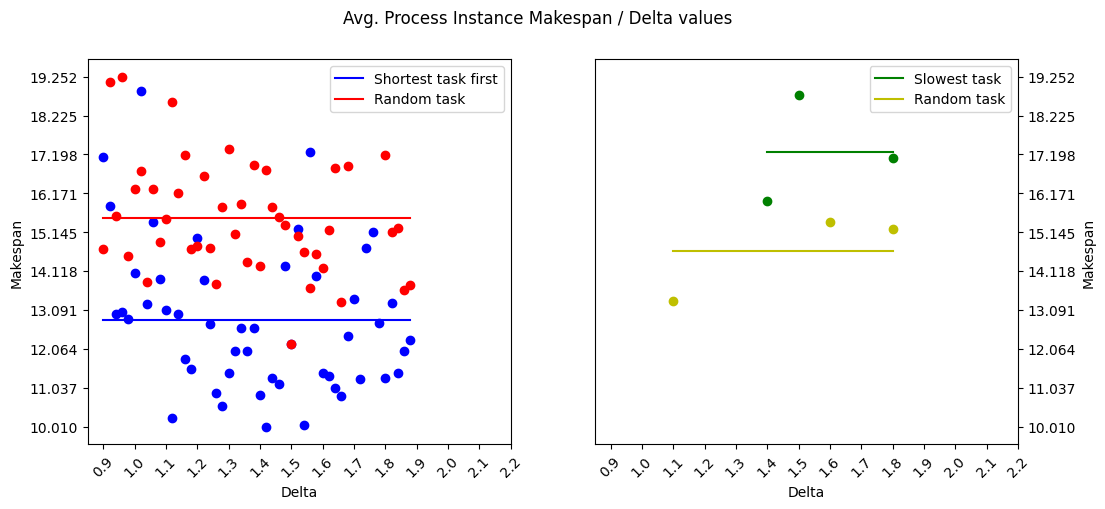

In [20]:

# Plot the data

fig, ax = plt.subplots(1,2, figsize=(12,5))

# fastest
delta_values = fastest_df['delta']
time_values = fastest_df['makespan']
ax[0].scatter(delta_values, time_values, marker='o', color='b')
x_fit = np.linspace(fastest_df['delta'].min(), fastest_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(fastest_df, 'makespan'))
ax[0].plot(x_fit, y_fit, color='b', label='Shortest task first')

# random
delta_values = random_df['delta']
time_values = random_df['makespan']
ax[0].scatter(delta_values, time_values, marker='o', color='r')
x_fit = np.linspace(random_df['delta'].min(), random_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(random_df, 'makespan'))
ax[0].plot(x_fit, y_fit, color='r', label='Random task')

ax[0].set_xlabel('Delta')
ax[0].set_ylabel('Makespan')
ax[0].set_yticks(np.linspace(df['makespan'].min(), df['makespan'].max(), 10))
ax[0].set_xticks([round(i,2) for i in np.linspace(0.9, 2.2, 14)])
ax[0].set_xticklabels(ax[0].get_xticks(), rotation=45)
ax[0].legend()

# second figure
# slowest
delta_values = slowest_df['delta']
time_values = slowest_df['makespan']
ax[1].scatter(delta_values, time_values, marker='o', color='g')
x_fit = np.linspace(delta_values.min(), delta_values.max(), 100)
y_fit = polynomial_func(x_fit, *params(slowest_df, 'makespan'))
ax[1].plot(x_fit, y_fit, color='g', label='Slowest task')

# EIF
delta_values = eif_df['delta']
time_values = eif_df['makespan']
ax[1].scatter(delta_values, time_values, marker='o', color='y')
x_fit = np.linspace(delta_values.min(), delta_values.max(), 100)
y_fit = polynomial_func(x_fit, *params(eif_df, 'makespan'))
ax[1].plot(x_fit, y_fit, color='y', label='Random task')

ax[1].set_xlabel('Delta')
ax[1].set_ylabel('Makespan')
ax[1].set_yticks(ax[0].get_yticks())
ax[1].set_ylim(ax[0].get_ylim())
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].set_xticks([round(i,2) for i in np.linspace(0.9, 2.2, 14)])
ax[1].set_xticklabels(ax[0].get_xticks(), rotation=45)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].legend()


# Set labels and title

plt.suptitle('Avg. Process Instance Makespan / Delta values')

#plt.xticks(rotation=45)

# Show the plot
plt.show()

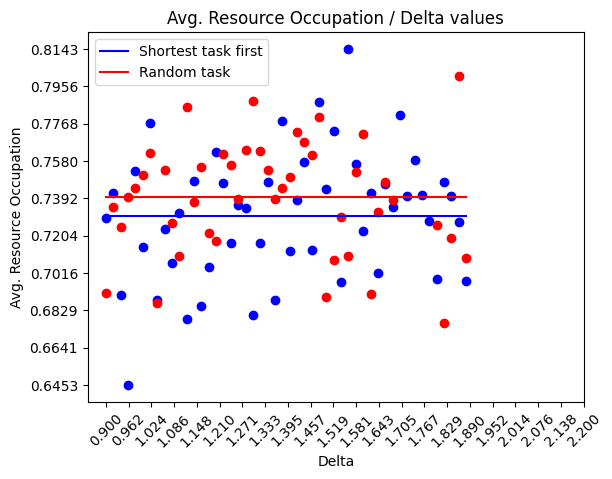

In [8]:
# Plot the data
#fastest
delta_values = fastest_df['delta']
y_values = fastest_df['resource occupation']
plt.scatter(delta_values, y_values, marker='o', color='b')

x_fit = np.linspace(fastest_df['delta'].min(), fastest_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(fastest_df, 'resource occupation'))
plt.plot(x_fit, y_fit, color='b', label='Shortest task first')

#random
delta_values = random_df['delta']
y_values = random_df['resource occupation']
plt.scatter(delta_values, y_values, marker='o', color='r')

x_fit = np.linspace(random_df['delta'].min(), random_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(random_df, 'resource occupation'))
plt.plot(x_fit, y_fit, color='r', label='Random task')



# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Avg. Resource Occupation')
plt.title('Avg. Resource Occupation / Delta values')
plt.yticks(np.linspace(df['resource occupation'].min(), df['resource occupation'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

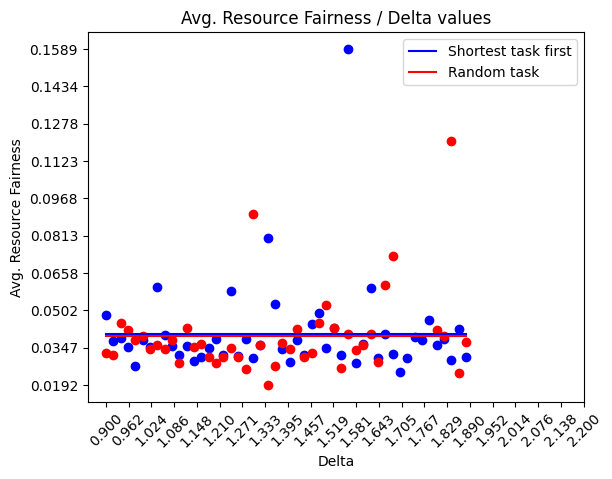

In [9]:
# Plot the data
#fastest
delta_values = fastest_df['delta']
y_values = fastest_df['resource fairness']
plt.scatter(delta_values, y_values, marker='o', color='b')

x_fit = np.linspace(fastest_df['delta'].min(), fastest_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(fastest_df, 'resource fairness'))
plt.plot(x_fit, y_fit, color='b', label='Shortest task first')

#random
delta_values = random_df['delta']
y_values = random_df['resource fairness']
plt.scatter(delta_values, y_values, marker='o', color='r')

x_fit = np.linspace(random_df['delta'].min(), random_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(random_df, 'resource fairness'))
plt.plot(x_fit, y_fit, color='r', label='Random task')



# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Avg. Resource Fairness')
plt.title('Avg. Resource Fairness / Delta values')
plt.yticks(np.linspace(df['resource fairness'].min(), df['resource fairness'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

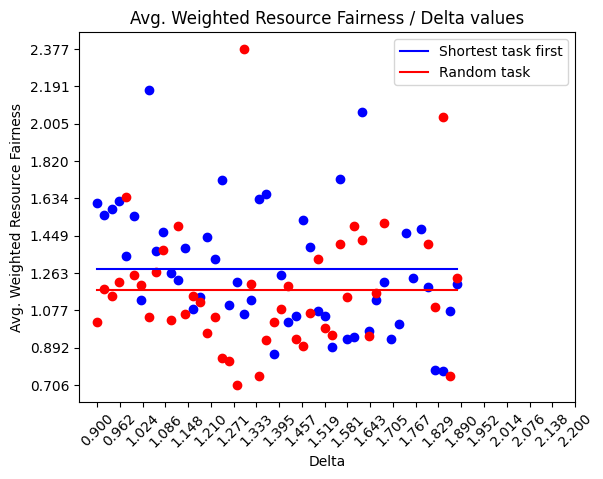

In [10]:
# Plot the data
#fastest
delta_values = fastest_df['delta']
y_values = fastest_df['weighted resource fairness']
plt.scatter(delta_values, y_values, marker='o', color='b')

x_fit = np.linspace(fastest_df['delta'].min(), fastest_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(fastest_df, 'weighted resource fairness'))
plt.plot(x_fit, y_fit, color='b', label='Shortest task first')

#random
delta_values = random_df['delta']
y_values = random_df['weighted resource fairness']
plt.scatter(delta_values, y_values, marker='o', color='r')

x_fit = np.linspace(random_df['delta'].min(), random_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(random_df, 'weighted resource fairness'))
plt.plot(x_fit, y_fit, color='r', label='Random task')



# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Avg. Weighted Resource Fairness')
plt.title('Avg. Weighted Resource Fairness / Delta values')
plt.yticks(np.linspace(df['weighted resource fairness'].min(), df['weighted resource fairness'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

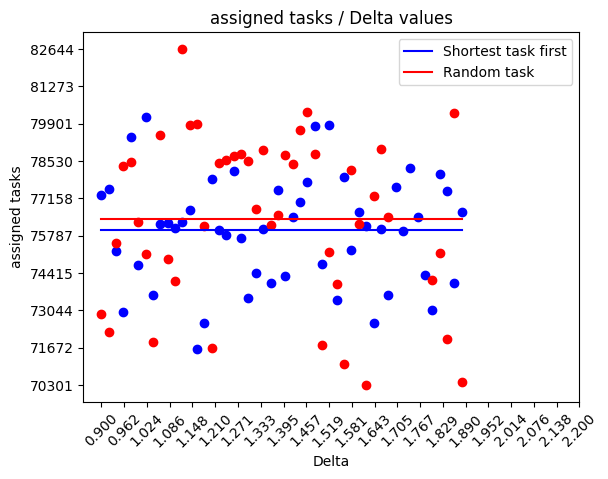

In [11]:
# Plot the data
#fastest
delta_values = fastest_df['delta']
y_values = fastest_df['assigned tasks']
plt.scatter(delta_values, y_values, marker='o', color='b')

x_fit = np.linspace(fastest_df['delta'].min(), fastest_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(fastest_df, 'assigned tasks'))
plt.plot(x_fit, y_fit, color='b', label='Shortest task first')

#random
delta_values = random_df['delta']
y_values = random_df['assigned tasks']
plt.scatter(delta_values, y_values, marker='o', color='r')

x_fit = np.linspace(random_df['delta'].min(), random_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(random_df, 'assigned tasks'))
plt.plot(x_fit, y_fit, color='r', label='Random task')



# Set labels and title
plt.xlabel('Delta')
plt.ylabel('assigned tasks')
plt.title('assigned tasks / Delta values')
plt.yticks(np.linspace(df['assigned tasks'].min(), df['assigned tasks'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

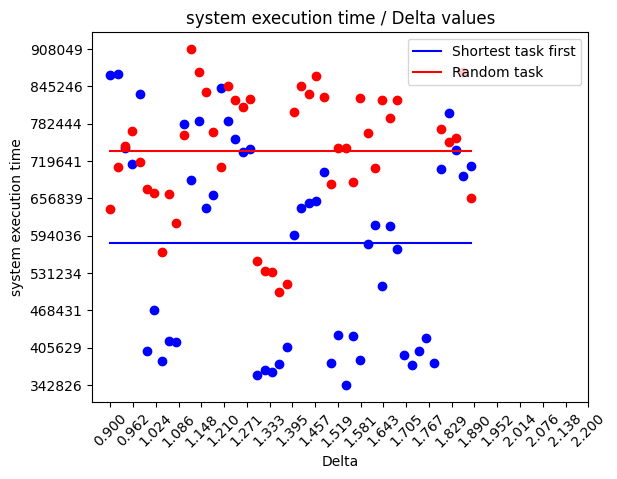

In [12]:
# Plot the data
#fastest
delta_values = fastest_df['delta']
y_values = fastest_df['system execution time']
plt.scatter(delta_values, y_values, marker='o', color='b')

x_fit = np.linspace(fastest_df['delta'].min(), fastest_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(fastest_df, 'system execution time'))
plt.plot(x_fit, y_fit, color='b', label='Shortest task first')

#random
delta_values = random_df['delta']
y_values = random_df['system execution time']
plt.scatter(delta_values, y_values, marker='o', color='r')

x_fit = np.linspace(random_df['delta'].min(), random_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(random_df, 'system execution time'))
plt.plot(x_fit, y_fit, color='r', label='Random task')



# Set labels and title
plt.xlabel('Delta')
plt.ylabel('system execution time')
plt.title('system execution time / Delta values')
plt.yticks(np.linspace(df['system execution time'].min(), df['system execution time'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

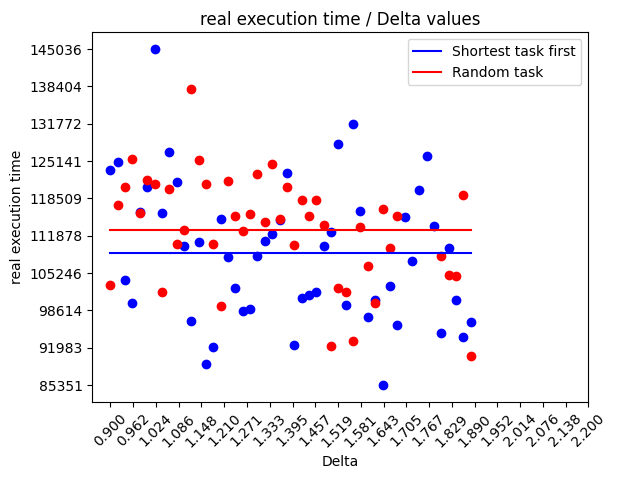

In [13]:
# Plot the data
#fastest
delta_values = fastest_df['delta']
y_values = fastest_df['real execution time']
plt.scatter(delta_values, y_values, marker='o', color='b')

x_fit = np.linspace(fastest_df['delta'].min(), fastest_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(fastest_df, 'real execution time'))
plt.plot(x_fit, y_fit, color='b', label='Shortest task first')

#random
delta_values = random_df['delta']
y_values = random_df['real execution time']
plt.scatter(delta_values, y_values, marker='o', color='r')

x_fit = np.linspace(random_df['delta'].min(), random_df['delta'].max(), 100)
y_fit = polynomial_func(x_fit, *params(random_df, 'real execution time'))
plt.plot(x_fit, y_fit, color='r', label='Random task')



# Set labels and title
plt.xlabel('Delta')
plt.ylabel('real execution time')
plt.title('real execution time / Delta values')
plt.yticks(np.linspace(df['real execution time'].min(), df['real execution time'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

ValueError: x and y must be the same size

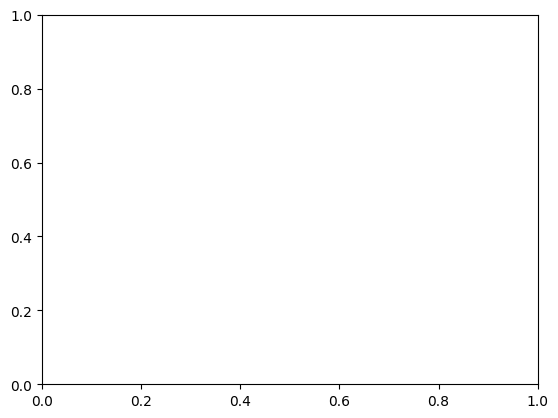

In [14]:
allocated_tasks = df['allocated tasks']
postponed_tasks = df['postponed tasks']
assigned_tasks = df['assigned tasks']


fig, ax1 = plt.subplots()

# Plot 'succeeded' data in green
ax1.scatter(delta_values, allocated_tasks, marker='o', color='green', label='Allocated Tasks')
ax1.set_ylabel('Allocated Tasks')
ax1.set_xlabel('Delta')
ax1.set_ylim(0, 1000000)

ax2 = ax1.twinx() 
ax2.scatter(delta_values, postponed_tasks, marker='o' , color='red', label='Postponed Tasks')
ax2.set_ylim(0, 10000000)
ax2.set_ylabel('Postponed Tasks')

#ax3 = ax1.twinx() 
#ax3.scatter(delta_values, assigned_tasks, marker='o' , color='blue', label='Assigned Tasks')
#ax3.set_ylabel('Assigned Tasks')
#ax3.set_ylim(assigned_tasks.min(), assigned_tasks.max())


#plt.scatter(delta_values_stopped, time_values_stopped, marker='o' , color='blue', label='Fairness')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#lines3, labels3 = ax3.get_legend_handles_labels()
#ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')
#ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='lower right')
ax1.legend(lines + lines2, labels + labels2, loc='lower right')



#plt.yticks(np.linspace(min(allocated_tasks.min(), postponed_tasks.min()),
#                       max(postponed_tasks.min(), postponed_tasks.max()),
#                       100))
#plt.xticks(np.linspace(0.9, 2.2, 22))
#plt.ylabel('Tasks')


plt.xticks(rotation=45)

# Show the plot
plt.show()

In [ ]:
df = df[df['result message'] != 'Stopped']
df = df.sort_values(by='delta')

# Extract relevant columns
sub_df = df[df['resource worklist rule']== 'random']

random_delta_values = sub_df['delta']
random_time_values = sub_df['makespan']

sub_df = df[df['resource worklist rule']== 'fastest']
fastest_delta_values = sub_df['delta']
fastest_time_values = sub_df['makespan']

# Plot the data
plt.scatter(random_delta_values, random_time_values, marker='o', color='b', label='Random selection')
plt.scatter(fastest_delta_values, fastest_time_values, marker='o', color='g', label='Fastest first selection')


# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Makespan')
plt.title('Delta vs Time Plot')

plt.yticks(np.linspace(df['makespan'].min(), df['makespan'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

In [ ]:
df = df[df['result message'] != 'Stopped']
df = df.sort_values(by='delta')

# Extract relevant columns
sub_df = df[df['resource worklist rule']== 'random']

random_delta_values = sub_df['delta']
random_time_values = sub_df['resource occupation']

sub_df = df[df['resource worklist rule']== 'fastest']
fastest_delta_values = sub_df['delta']
fastest_time_values = sub_df['resource occupation']

# Plot the data
plt.scatter(random_delta_values, random_time_values, marker='o', color='b', label='Random selection')
plt.scatter(fastest_delta_values, fastest_time_values, marker='o', color='g', label='Fastest first selection')


# Set labels and title
plt.xlabel('Resource occupation')
plt.ylabel('Makespan')
plt.title('Resource occupation vs Time Plot')

plt.yticks(np.linspace(df['resource occupation'].min(), df['resource occupation'].max(), 10))
plt.yticks(np.linspace(0, 1, 10))

plt.ylim(0, 1)
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

In [ ]:
df = df[df['result message'] != 'Stopped']
df = df.sort_values(by='delta')

# Extract relevant columns
sub_df = df[df['resource worklist rule']== 'random']

random_delta_values = sub_df['delta']
random_time_values = sub_df['resource fairness']

sub_df = df[df['resource worklist rule']== 'fastest']
fastest_delta_values = sub_df['delta']
fastest_time_values = sub_df['resource fairness']

# Plot the data
plt.scatter(random_delta_values, random_time_values, marker='o', color='b', label='Random selection')
plt.scatter(fastest_delta_values, fastest_time_values, marker='o', color='g', label='Fastest first selection')


# Set labels and title
plt.xlabel('Resource fairness')
plt.ylabel('Makespan')
plt.title('Resource fairness vs Time Plot')

plt.yticks(np.linspace(df['resource fairness'].min(), df['resource fairness'].max(), 10))
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

In [ ]:
df = df[df['result message'] != 'Stopped']
df = df.sort_values(by='delta')

# Extract relevant columns
sub_df = df[df['resource worklist rule']== 'random']

random_delta_values = sub_df['delta']
random_time_values = sub_df['resource fairness']

sub_df = df[df['resource worklist rule']== 'fastest']
fastest_delta_values = sub_df['delta']
fastest_time_values = sub_df['resource fairness']

# Plot the data
plt.scatter(random_delta_values, random_time_values, marker='o', color='b', label='Random selection')
plt.scatter(fastest_delta_values, fastest_time_values, marker='o', color='g', label='Fastest first selection')


# Set labels and title
plt.xlabel('Resource fairness')
plt.ylabel('Makespan')
plt.title('Resource fairness vs Time Plot')

plt.yticks(np.linspace(0, 0.2, 10))
plt.ylim(0, 0.2)
plt.xticks(np.linspace(0.9, 2.2, 22))

plt.xticks(rotation=45)

# Show the plot
plt.legend()
plt.show()

In [ ]:
print(len(df))

In [ ]:

df_succeeded = df[df['result message'].str.startswith('COMPLETED')]

# Filter rows for 'stopped' state
df_stopped = df[df['result message'].astype(str) == ' Stopped']

# Extract relevant columns
delta_values_succeeded = df_succeeded['delta']
occupation_values_succeeded = df_succeeded['resource occupation']
fairness_values_succeeded = df_succeeded['resource fairness']
time_values_succeeded = df_succeeded['makespan']

delta_values_stopped = df_stopped['delta']
time_values_stopped = df_stopped['makespan']

fig, ax1 = plt.subplots()

# Plot 'succeeded' data in green
ax1.scatter(delta_values_succeeded, time_values_succeeded, marker='o', color='green', label='Makespan')
ax1.set_ylabel('makespan')

ax2 = ax1.twinx() 
ax2.scatter(delta_values_succeeded, occupation_values_succeeded, marker='o' , color='red', label='Occupation')
ax2.set_ylabel('Occupation')

#ax3 = ax2.twinx()
#ax3.scatter(delta_values_succeeded, fairness_values_succeeded, marker='o' , color='blue', label='Fairness')
#ax3.set_ylabel('Fairness')


#plt.scatter(delta_values_stopped, time_values_stopped, marker='o' , color='blue', label='Fairness')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#lines3, labels3 = ax3.get_legend_handles_labels()
#ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

#plt.yticks(np.linspace(df['makespan'].min(), df['makespan'].max(), 10))

# Set labels and title
plt.xlabel('Delta')
#plt.ylabel('Time')
plt.title('Delta vs Time Plot')

# Show legend
#plt.legend()

# Show the plot
plt.show()

In [ ]:
df_succeeded = df[df['state'].astype(str) == ' Succeeded']

# Filter rows for 'stopped' state
df_stopped = df[df['state'].astype(str) == ' Stopped']

# Extract relevant columns
delta_values_succeeded = df_succeeded['delta']
occupation_values_succeeded = df_succeeded['occupation']

delta_values_stopped = df_stopped['delta']
occupation_values_stopped = df_stopped['occupation']

# Plot 'succeeded' data in green
plt.scatter(occupation_values_succeeded, time_values_succeeded, marker='o', color='green', label='Succeeded')
plt.scatter(occupation_values_stopped, time_values_stopped, marker='o' , color='red', label='Stopped')


plt.ylim(0, 500)

# Set labels and title
plt.xlabel('Delta')
plt.ylabel('Time')
plt.title('Delta vs Time Plot')

# Show legend
plt.legend()

# Show the plot
plt.show()